# MANUAL LINEAL EXAMPLE WITH 11 NETWORKS : 10 LINEAL ,1 FIXED

In [38]:
# import libraries
from classes.cbnetwork import CBN
from classes.directededge import DirectedEdge
from classes.internalvariable import InternalVariable
from classes.localnetwork import LocalNetwork

# pass the parameters
n_local_nets = 10
n_var_net = 5
n_total_var = n_local_nets * n_var_net

# Generate the variables per network

In [39]:
d_nets_vars = {i: list(range(n_var_net * (i - 1) + 1, n_var_net * i + 1)) for i in range(1, n_local_nets + 1)}
# Especial network variables
d_nets_vars[11] = [61, 62, 63, 64]
d_nets_vars

{1: [1, 2, 3, 4, 5],
 2: [6, 7, 8, 9, 10],
 3: [11, 12, 13, 14, 15],
 4: [16, 17, 18, 19, 20],
 5: [21, 22, 23, 24, 25],
 6: [26, 27, 28, 29, 30],
 7: [31, 32, 33, 34, 35],
 8: [36, 37, 38, 39, 40],
 9: [41, 42, 43, 44, 45],
 10: [46, 47, 48, 49, 50],
 11: [61, 62, 63, 64]}

# Generate the edges of the linear CBN

In [40]:
l_edges = [(i, i + 1) for i in range(1, 10)]
# Especial relation
l_edges.append((11, 1))
l_edges

[(1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (9, 10),
 (11, 1)]

# Generate Networks

In [41]:
l_local_networks = []
for i_local_net in d_nets_vars.keys():
    # generate the Local network
    o_local_network = LocalNetwork(i_local_net, d_nets_vars[i_local_net])
    l_local_networks.append(o_local_network)
    # Show the local network
    o_local_network.show()

Local Network 1
Variables intern :  [1, 2, 3, 4, 5]
Local Network 2
Variables intern :  [6, 7, 8, 9, 10]
Local Network 3
Variables intern :  [11, 12, 13, 14, 15]
Local Network 4
Variables intern :  [16, 17, 18, 19, 20]
Local Network 5
Variables intern :  [21, 22, 23, 24, 25]
Local Network 6
Variables intern :  [26, 27, 28, 29, 30]
Local Network 7
Variables intern :  [31, 32, 33, 34, 35]
Local Network 8
Variables intern :  [36, 37, 38, 39, 40]
Local Network 9
Variables intern :  [41, 42, 43, 44, 45]
Local Network 10
Variables intern :  [46, 47, 48, 49, 50]
Local Network 11
Variables intern :  [61, 62, 63, 64]


# Generate Directed Edges

In [42]:
l_directed_edges = []
cont_output_variable = 0
index_variable_signal = (n_local_nets * n_var_net) + 1
for t_edge in l_edges[:-1]:
    l_output_variables = [4 + cont_output_variable, 5 + cont_output_variable]
    # generate coupling function
    coupling_function = " " + " ∧ ".join(map(str, l_output_variables)) + " "
    # generate the Directed Edge object
    o_directed_edge = DirectedEdge(index_variable_signal, t_edge[1], t_edge[0], l_output_variables, coupling_function)
    # add the directed object to list
    l_directed_edges.append(o_directed_edge)
    # updating the count of variables
    cont_output_variable += 5
    # updating the index variable signal
    index_variable_signal += 1
    # show the created directed edge
    o_directed_edge.show()

# Edge from the Especial Network
t_edge = l_edges[-1]
l_output_variables = [63, 64]
coupling_function = " " + " ∨ ".join(map(str, l_output_variables)) + " "
o_directed_edge = DirectedEdge(65, t_edge[1], t_edge[0], l_output_variables, coupling_function)
l_directed_edges.append(o_directed_edge)

o_directed_edge.show()

----------------------------------------------------
MESSAGE: DIRECTED EDGE: 1 -> 2 INDEX: 51
MESSAGE: Variables: [4, 5] Coupling Function:  4 ∧ 5 
MESSAGE: Truth Table: {'11': '1', '10': '0', '01': '0', '00': '0'}
MESSAGE: Kind of coupling function 2  -  not compute
----------------------------------------------------
MESSAGE: DIRECTED EDGE: 2 -> 3 INDEX: 52
MESSAGE: Variables: [9, 10] Coupling Function:  9 ∧ 10 
MESSAGE: Truth Table: {'11': '1', '10': '0', '01': '0', '00': '0'}
MESSAGE: Kind of coupling function 2  -  not compute
----------------------------------------------------
MESSAGE: DIRECTED EDGE: 3 -> 4 INDEX: 53
MESSAGE: Variables: [14, 15] Coupling Function:  14 ∧ 15 
MESSAGE: Truth Table: {'11': '1', '10': '0', '01': '0', '00': '0'}
MESSAGE: Kind of coupling function 2  -  not compute
----------------------------------------------------
MESSAGE: DIRECTED EDGE: 4 -> 5 INDEX: 54
MESSAGE: Variables: [19, 20] Coupling Function:  19 ∧ 20 
MESSAGE: Truth Table: {'11': '1', '10'

# Generate the functions for every variable in the CBN

In [43]:
d_var_cnf_func = {}
count_network = 1
count_var = 0
for o_local_network in l_local_networks:
    d_var_cnf_func[count_var + 1] = [[count_var + 2, -(count_var + 3), count_var + 4]]
    d_var_cnf_func[count_var + 2] = [[count_var + 1, -(count_var + 3), -(count_var + 5)]]
    d_var_cnf_func[count_var + 3] = [[-(count_var + 2), -(count_var + 4), count_var + 5]]
    if o_local_network.index == 1:
        d_var_cnf_func[count_var + 4] = [[count_var + 3, count_var + 5, 65]]
        d_var_cnf_func[count_var + 5] = [[count_var + 1, count_var + 2]]
    else:
        d_var_cnf_func[count_var + 4] = [[count_var + 3, count_var + 5, n_total_var + o_local_network.index - 1]]
        d_var_cnf_func[count_var + 5] = [[-(count_var + 1), count_var + 2, n_total_var + o_local_network.index - 1]]
    count_var += 5
    count_network += 1

# Generate the function variables for the Especial Network
d_var_cnf_func[61] = [[-62, 63]]
d_var_cnf_func[62] = [[61, 63]]
d_var_cnf_func[63] = [[64, -61, 62]]
d_var_cnf_func[64] = [[61, -62]]

# put the cnf function for the variable
for o_local_network in l_local_networks:
    l_input_signals = DirectedEdge.find_input_edges_by_network_index(o_local_network.index, l_directed_edges)
    o_local_network.process_input_signals(l_input_signals)
    for i_local_variable in o_local_network.l_var_intern:
        o_variable_model = InternalVariable(i_local_variable, d_var_cnf_func[i_local_variable])
        o_local_network.des_funct_variables.append(o_variable_model)
        o_variable_model.show()


V: 1 -> CNF :[[2, -3, 4]]
V: 2 -> CNF :[[1, -3, -5]]
V: 3 -> CNF :[[-2, -4, 5]]
V: 4 -> CNF :[[3, 5, 65]]
V: 5 -> CNF :[[1, 2]]
V: 6 -> CNF :[[7, -8, 9]]
V: 7 -> CNF :[[6, -8, -10]]
V: 8 -> CNF :[[-7, -9, 10]]
V: 9 -> CNF :[[8, 10, 51]]
V: 10 -> CNF :[[-6, 7, 51]]
V: 11 -> CNF :[[12, -13, 14]]
V: 12 -> CNF :[[11, -13, -15]]
V: 13 -> CNF :[[-12, -14, 15]]
V: 14 -> CNF :[[13, 15, 52]]
V: 15 -> CNF :[[-11, 12, 52]]
V: 16 -> CNF :[[17, -18, 19]]
V: 17 -> CNF :[[16, -18, -20]]
V: 18 -> CNF :[[-17, -19, 20]]
V: 19 -> CNF :[[18, 20, 53]]
V: 20 -> CNF :[[-16, 17, 53]]
V: 21 -> CNF :[[22, -23, 24]]
V: 22 -> CNF :[[21, -23, -25]]
V: 23 -> CNF :[[-22, -24, 25]]
V: 24 -> CNF :[[23, 25, 54]]
V: 25 -> CNF :[[-21, 22, 54]]
V: 26 -> CNF :[[27, -28, 29]]
V: 27 -> CNF :[[26, -28, -30]]
V: 28 -> CNF :[[-27, -29, 30]]
V: 29 -> CNF :[[28, 30, 55]]
V: 30 -> CNF :[[-26, 27, 55]]
V: 31 -> CNF :[[32, -33, 34]]
V: 32 -> CNF :[[31, -33, -35]]
V: 33 -> CNF :[[-32, -34, 35]]
V: 34 -> CNF :[[33, 35, 56]]
V: 35 -> C

# Generating the CBN network

In [44]:
o_cbn = CBN(l_local_networks, l_directed_edges)

------------------
CBN object created


# show graph with networkx

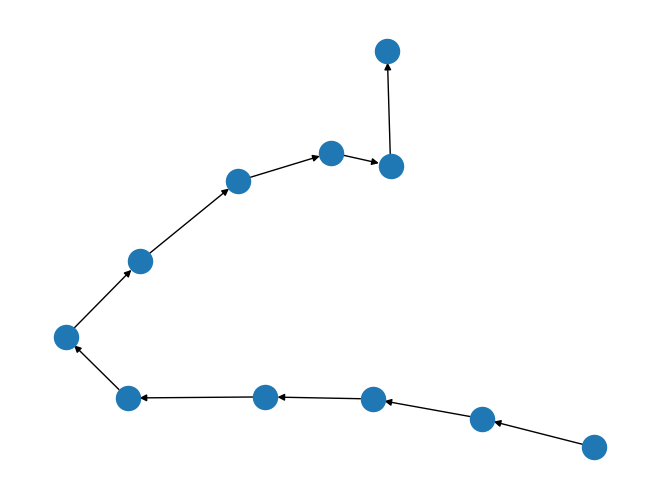

In [45]:
o_cbn.show_cbn_graph()

# Find local attractors with optimized method

In [46]:
o_cbn.find_attractors()

MESSAGE: FIND ATTRACTORS USING OPTIMIZED METHOD
-------------------------------------
MESSAGE: Begin of the initial loop
MESSAGE: NETWORK NUMBER :  11  PERMUTATION SIGNAL COUPLING:  None
MESSAGE: BEGIN TO FIND ATTRACTORS
MESSAGE: The expression cannot be satisfied
MESSAGE: end find attractors
MESSAGE: the attractor signal value is stable
MESSAGE: the scene signal is restricted
MESSAGE: the output signal is restricted
MESSAGE: INITIAL HEAP
[11, 1, 3, 4, 2, 6, 7, 8, 9, 10, 5]
MESSAGE: UPDATE HEAP
[3, 1, 7, 4, 2, 6, 5, 8, 9, 10]
MESSAGE: NETWORK NUMBER :  3  PERMUTATION SIGNAL COUPLING:  0
MESSAGE: BEGIN TO FIND ATTRACTORS
MESSAGE: The expression cannot be satisfied
MESSAGE: end find attractors
MESSAGE: NETWORK NUMBER :  3  PERMUTATION SIGNAL COUPLING:  1
MESSAGE: BEGIN TO FIND ATTRACTORS
MESSAGE: The expression cannot be satisfied
MESSAGE: end find attractors
INFO: Local Network: 3 Weight: 2
INFO: Local network: 3
INFO: Index variable output signal: 53
INFO: Output variables: [14, 15]
{'

# show attractors

In [47]:
o_cbn.show_attractors()

Network: 1
--------------
Network: 1 - Scene: ('0',)
Attractors number: 1
--------------
['1', '1', '1', '1', '1', '0']
--------------
Network: 1 - Scene: ('1',)
Attractors number: 1
--------------
['1', '1', '1', '1', '1', '1']
Network: 2
--------------
Network: 2 - Scene: ('0',)
Attractors number: 1
--------------
['1', '1', '1', '1', '1', '0']
--------------
Network: 2 - Scene: ('1',)
Attractors number: 1
--------------
['1', '1', '1', '1', '1', '1']
Network: 3
--------------
Network: 3 - Scene: ('0',)
Attractors number: 1
--------------
['1', '1', '1', '1', '1', '0']
--------------
Network: 3 - Scene: ('1',)
Attractors number: 1
--------------
['1', '1', '1', '1', '1', '1']
Network: 4
--------------
Network: 4 - Scene: ('0',)
Attractors number: 1
--------------
['1', '1', '1', '1', '1', '0']
--------------
Network: 4 - Scene: ('1',)
Attractors number: 1
--------------
['1', '1', '1', '1', '1', '1']
Network: 5
--------------
Network: 5 - Scene: ('0',)
Attractors number: 1
----------

# show the kind of every coupled signal

In [48]:
o_cbn.show_coupled_signals_kind()

SHOW THE COUPLED SIGNALS KINDS
SIGNAL: 51 RELATION: 1 -> 2 KIND: 1 - restricted
SIGNAL: 52 RELATION: 2 -> 3 KIND: 1 - restricted
SIGNAL: 53 RELATION: 3 -> 4 KIND: 1 - restricted
SIGNAL: 54 RELATION: 4 -> 5 KIND: 1 - restricted
SIGNAL: 55 RELATION: 5 -> 6 KIND: 1 - restricted
SIGNAL: 56 RELATION: 6 -> 7 KIND: 1 - restricted
SIGNAL: 57 RELATION: 7 -> 8 KIND: 1 - restricted
SIGNAL: 58 RELATION: 8 -> 9 KIND: 1 - restricted
SIGNAL: 59 RELATION: 9 -> 10 KIND: 1 - restricted
SIGNAL: 65 RELATION: 11 -> 1 KIND: 1 - restricted


# find the compatible pairs

In [49]:
o_cbn.find_compatible_pairs()

FIND COMPATIBLE ATTRACTOR PAIRS
END FIND ATTRACTOR PAIRS


# show attractor pairs

In [50]:
o_cbn.show_attractor_pairs()

MESSAGE: LIST OF THE COMPATIBLE ATTRACTOR PAIRS
----------------------------------------------------
MESSAGE: Edge  1 -> 2
----------------------------------------------------
INFO: Coupling Variable -  51 Value -  0
----------------------------------------------------
INFO: Coupling Variable -  51 Value -  1
INFO: Network Index - 1 , Input Signal Index - [65] , Scene - 0 , Attractor Index - 1 , States - [1,1,1,1,1,0,]
INFO: Network Index - 2 , Input Signal Index - [51] , Scene - 1 , Attractor Index - 1 , States - [1,1,1,1,1,1,]
INFO: Network Index - 1 , Input Signal Index - [65] , Scene - 1 , Attractor Index - 1 , States - [1,1,1,1,1,1,]
INFO: Network Index - 2 , Input Signal Index - [51] , Scene - 1 , Attractor Index - 1 , States - [1,1,1,1,1,1,]
----------------------------------------------------
MESSAGE: Edge  2 -> 3
----------------------------------------------------
INFO: Coupling Variable -  52 Value -  0
----------------------------------------------------
INFO: Coupling Vari